In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, AvgPool2D, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import torch

In [4]:
train_data0 = np.load('/kaggle/input/dl-project/DL-Project/data0.npy')
train_data1 = np.load('/kaggle/input/dl-project/DL-Project/data1.npy')
train_data2 = np.load('/kaggle/input/dl-project/DL-Project/data2.npy')

train_lab0 = np.load('/kaggle/input/dl-project/DL-Project/lab0.npy')
train_lab1 = np.load('/kaggle/input/dl-project/DL-Project/lab1.npy')
train_lab2 = np.load('/kaggle/input/dl-project/DL-Project/lab2.npy')


In [5]:
# Concatenate the training data arrays vertically
train_data = np.vstack((train_data0, train_data1, train_data2))
# Concatenate the labels arrays horizontally 
train_lab = np.hstack((train_lab0, train_lab1, train_lab2))

print("Dataset sizes:", train_data.shape, train_lab.shape)

Dataset sizes: (30000, 40, 168) (30000,)


In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(train_data, train_lab, test_size=0.2, random_state=42)
# Define image dimensions and reshape data to include a single channel
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Train Test split:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train Test split: (24000, 40, 168, 1) (6000, 40, 168, 1) (24000,) (6000,)


In [7]:
print("Label counts y_train:", np.unique(y_train, return_counts=True))

Label counts y_train: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=uint8), array([   1,    8,   29,   42,  101,  172,  228,  308,  429,  575,  694,
        862, 1065, 1145, 1285, 1452, 1512, 1575, 1664, 1569, 1461, 1386,
       1260, 1093,  923,  872,  663,  507,  360,  271,  194,  126,   86,
         49,   25,    6,    2]))


In [8]:
# Number of unique categories
num_category = 37
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
print("One-hot encoded label size:", y_train.shape, y_test.shape)

One-hot encoded label size: (24000, 37) (6000, 37)


### CNN

In [9]:
# Check for GPU availability and assign device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [52]:
with tf.device('/gpu:0'):
    model= Sequential()
    # Convulational layers
    model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(128,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_category*2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_category, activation='softmax'))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 38, 166, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 38, 166, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 36, 164, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 36, 164, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 18, 82, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 16, 80, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 16, 80, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 14, 78, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 14, 78, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 7, 39, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 5, 37, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 5, 37, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 3, 35, 128)          │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 3, 35, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 1, 17, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 2176)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 100)                 │         217,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 74)                  │           7,474 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 516,173 (1.97 MB)

 Trainable params: 515,277 (1.97 MB)

 Non-trainable params: 896 (3.50 KB)

None


### Training model

In [11]:
# Training Parameters
batch_size = 100
num_epoch = 70

# Ensure X_train and y_train are numpy arrays
print(type(X_train), type(y_train))  

# Train the model
model_log = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=num_epoch,
    verbose=1,
    validation_data=(X_test, y_test)
)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Epoch 1/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.0565 - loss: 3.3976 - val_accuracy: 0.0318 - val_loss: 3.5241
Epoch 2/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.0783 - loss: 3.0710 - val_accuracy: 0.0597 - val_loss: 3.0233
Epoch 3/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.1565 - loss: 2.3590 - val_accuracy: 0.2193 - val_loss: 2.0520
Epoch 4/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.2312 - loss: 2.0161 - val_accuracy: 0.2518 - val_loss: 1.9181
Epoch 5/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.2804 - loss: 1.8215 - val_accuracy: 0.2238 - val_loss: 2.0783
Epoch 6/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.3389 - loss: 1.6531 - val_accuracy: 0.3307 - val_loss: 1.6706
Epoch 7/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.3660 - loss: 1.5602 - val_accuracy: 0.3282 - val_loss: 1.7567
Epoch 8/70
240/240 ━━━━━━━━━━━━━━━━━━━━ 12

### Accuracy and Loss vs Epoch Graphs

<Figure size 640x480 with 0 Axes>

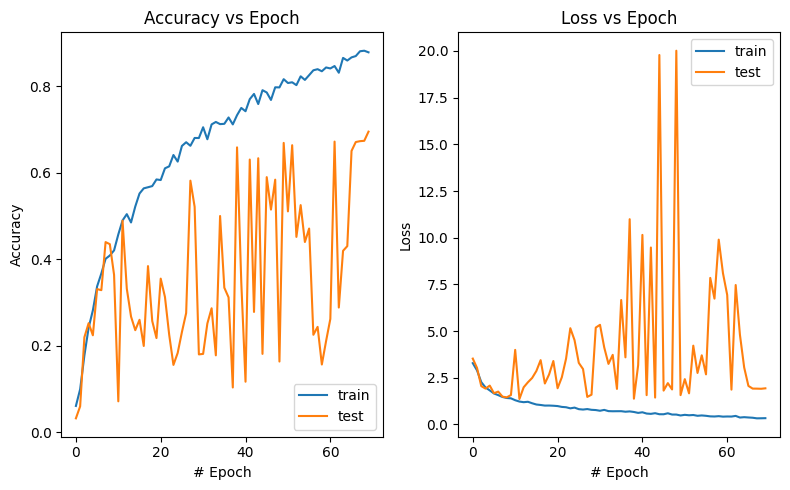

In [12]:
fig = plt.figure()
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.savefig("CNN3MetricPlot.png")

In [13]:
# Save model and weights 
file_name = "CNN3Model"
model_json = model.to_json()
with open(file_name + ".json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(file_name +".weights.h5")
print("Model Saved")

Model Saved


In [14]:
# Visualise predictions 
def check_answers(trained_model, X, Y, start):
  
  label_preds = trained_model.predict(X)
  f = plt.figure(figsize=(20,4))
  axs1 = f.add_subplot(241)
  axs2 = f.add_subplot(242)
  axs3 = f.add_subplot(243)
  axs4 = f.add_subplot(244)
  axs5 = f.add_subplot(245)
  axs6 = f.add_subplot(246)
  axs7 = f.add_subplot(247)
  axs8 = f.add_subplot(248)
  axs1.imshow(X[start, :, :, 0])
  axs1.set_title('Corr: ' + str(np.argmax(Y[start])) + " Pred: " + str(np.argmax(label_preds[start])))
  axs2.imshow(X[start+1, :, :, 0])
  axs2.set_title('Corr: ' + str(np.argmax(Y[start+1])) + " Pred: " + str(np.argmax(label_preds[start+1])))
  axs3.imshow(X[start+2, :, :, 0])
  axs3.set_title('Corr: ' + str(np.argmax(Y[start+2])) + " Pred: " + str(np.argmax(label_preds[start+2])))
  axs4.imshow(X[start+3, :, :, 0])
  axs4.set_title('Corr: ' + str(np.argmax(Y[start+3])) + " Pred: " + str(np.argmax(label_preds[start+3])))
  axs5.imshow(X[start+4, :, :, 0])
  axs5.set_title('Corr: ' + str(np.argmax(Y[start+4])) + " Pred: " + str(np.argmax(label_preds[start+4])))
  axs6.imshow(X[start+5, :, :, 0])
  axs6.set_title('Corr: ' + str(np.argmax(Y[start+5])) + " Pred: " + str(np.argmax(label_preds[start+5])))
  axs7.imshow(X[start+6, :, :, 0])
  axs7.set_title('Corr: ' + str(np.argmax(Y[start+6])) + " Pred: " + str(np.argmax(label_preds[start+6])))
  axs8.imshow(X[start+7, :, :, 0])
  axs8.set_title('Corr: ' + str(np.argmax(Y[start+7])) + " Pred: " + str(np.argmax(label_preds[start+7])))

# Evaluate the model using metrics
def check_metrics(model, X_test, y_test):  

  y_pred = np.argmax(model.predict(X_test),axis = 1)
  y_true = np.argmax(y_test, axis=1)
  print('##############  Confusion Matrix  ##############')
  print()
  np.set_printoptions(threshold=np.inf)
  print(confusion_matrix(y_true, y_pred))
  np.set_printoptions(threshold=100)
  print()
  print('##############  Classification Report  ##############')
  print()
  target_names = [str(i) for i in range(37)]
  print(classification_report(y_true, y_pred, target_names=target_names))

### Metrics and Prediction Visualisation

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
##############  Confusion Matrix  ##############

[[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   4   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  12   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   1  24   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   3  17   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


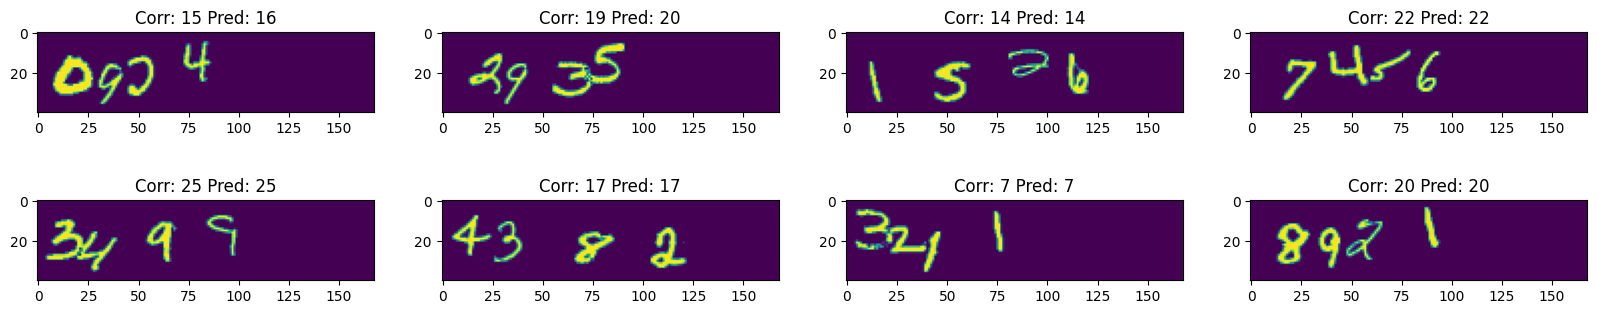

In [15]:
check_answers(model, X_test, y_test, 576)
check_metrics(model, X_test, y_test)